In [1]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install pandas
!pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# **EDA**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data into a DataFrame
df = pd.read_csv("utils/tc/occlusion2.csv", header=None, names=['Curve', 'Shape', 'X', 'Y'])

# 1. Basic Dataset Information
print("Basic Information:")
print(df.info())

# 2. Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# 3. Summary Statistics
print("\nSummary Statistics:")
print(df.describe())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Curve   1636 non-null   float64
 1   Shape   1636 non-null   float64
 2   X       1636 non-null   float64
 3   Y       1636 non-null   float64
dtypes: float64(4)
memory usage: 51.3 KB
None

Missing Values:
Curve    0
Shape    0
X        0
Y        0
dtype: int64

Summary Statistics:
             Curve   Shape            X            Y
count  1636.000000  1636.0  1636.000000  1636.000000
mean      2.911369     0.0   123.553578    94.471729
std       1.080873     0.0    69.313477    42.902791
min       0.000000     0.0     0.501571     0.500000
25%       2.000000     0.0    59.871796    61.597363
50%       3.000000     0.0   127.441826   105.487274
75%       4.000000     0.0   189.893616   125.549728
max       4.000000     0.0   241.964462   165.350006


In [3]:
# Group by Curve and Shape, then calculate the number of unique shapes
unique_shapes_df = df.groupby(['Curve', 'Shape']).size().reset_index(name='Count of coordinates')
print("Number of Unique Shapes after GroupBy:")
print(unique_shapes_df)

# Calculate Min and Max X, Y Coordinates for Each Shape
shape_bounds_df = df.groupby(['Curve', 'Shape']).agg(
    X_Min=('X', 'min'),
    X_Max=('X', 'max'),
    Y_Min=('Y', 'min'),
    Y_Max=('Y', 'max')
).reset_index()

print("\nMin and Max X, Y Coordinates for Each Shape:")
print(shape_bounds_df)

Number of Unique Shapes after GroupBy:
   Curve  Shape  Count of coordinates
0    0.0    0.0                    58
1    1.0    0.0                    67
2    2.0    0.0                   485
3    3.0    0.0                   378
4    4.0    0.0                   648

Min and Max X, Y Coordinates for Each Shape:
   Curve  Shape       X_Min       X_Max       Y_Min       Y_Max
0    0.0    0.0   22.847235   40.832001  105.980003  126.129997
1    1.0    0.0  196.641998  215.881302   46.180000   68.770000
2    2.0    0.0   27.601999  204.662003    0.500000  126.133141
3    3.0    0.0   52.181999  205.921997   85.760002  165.350006
4    4.0    0.0    0.501571  241.964462   36.674747  141.322678


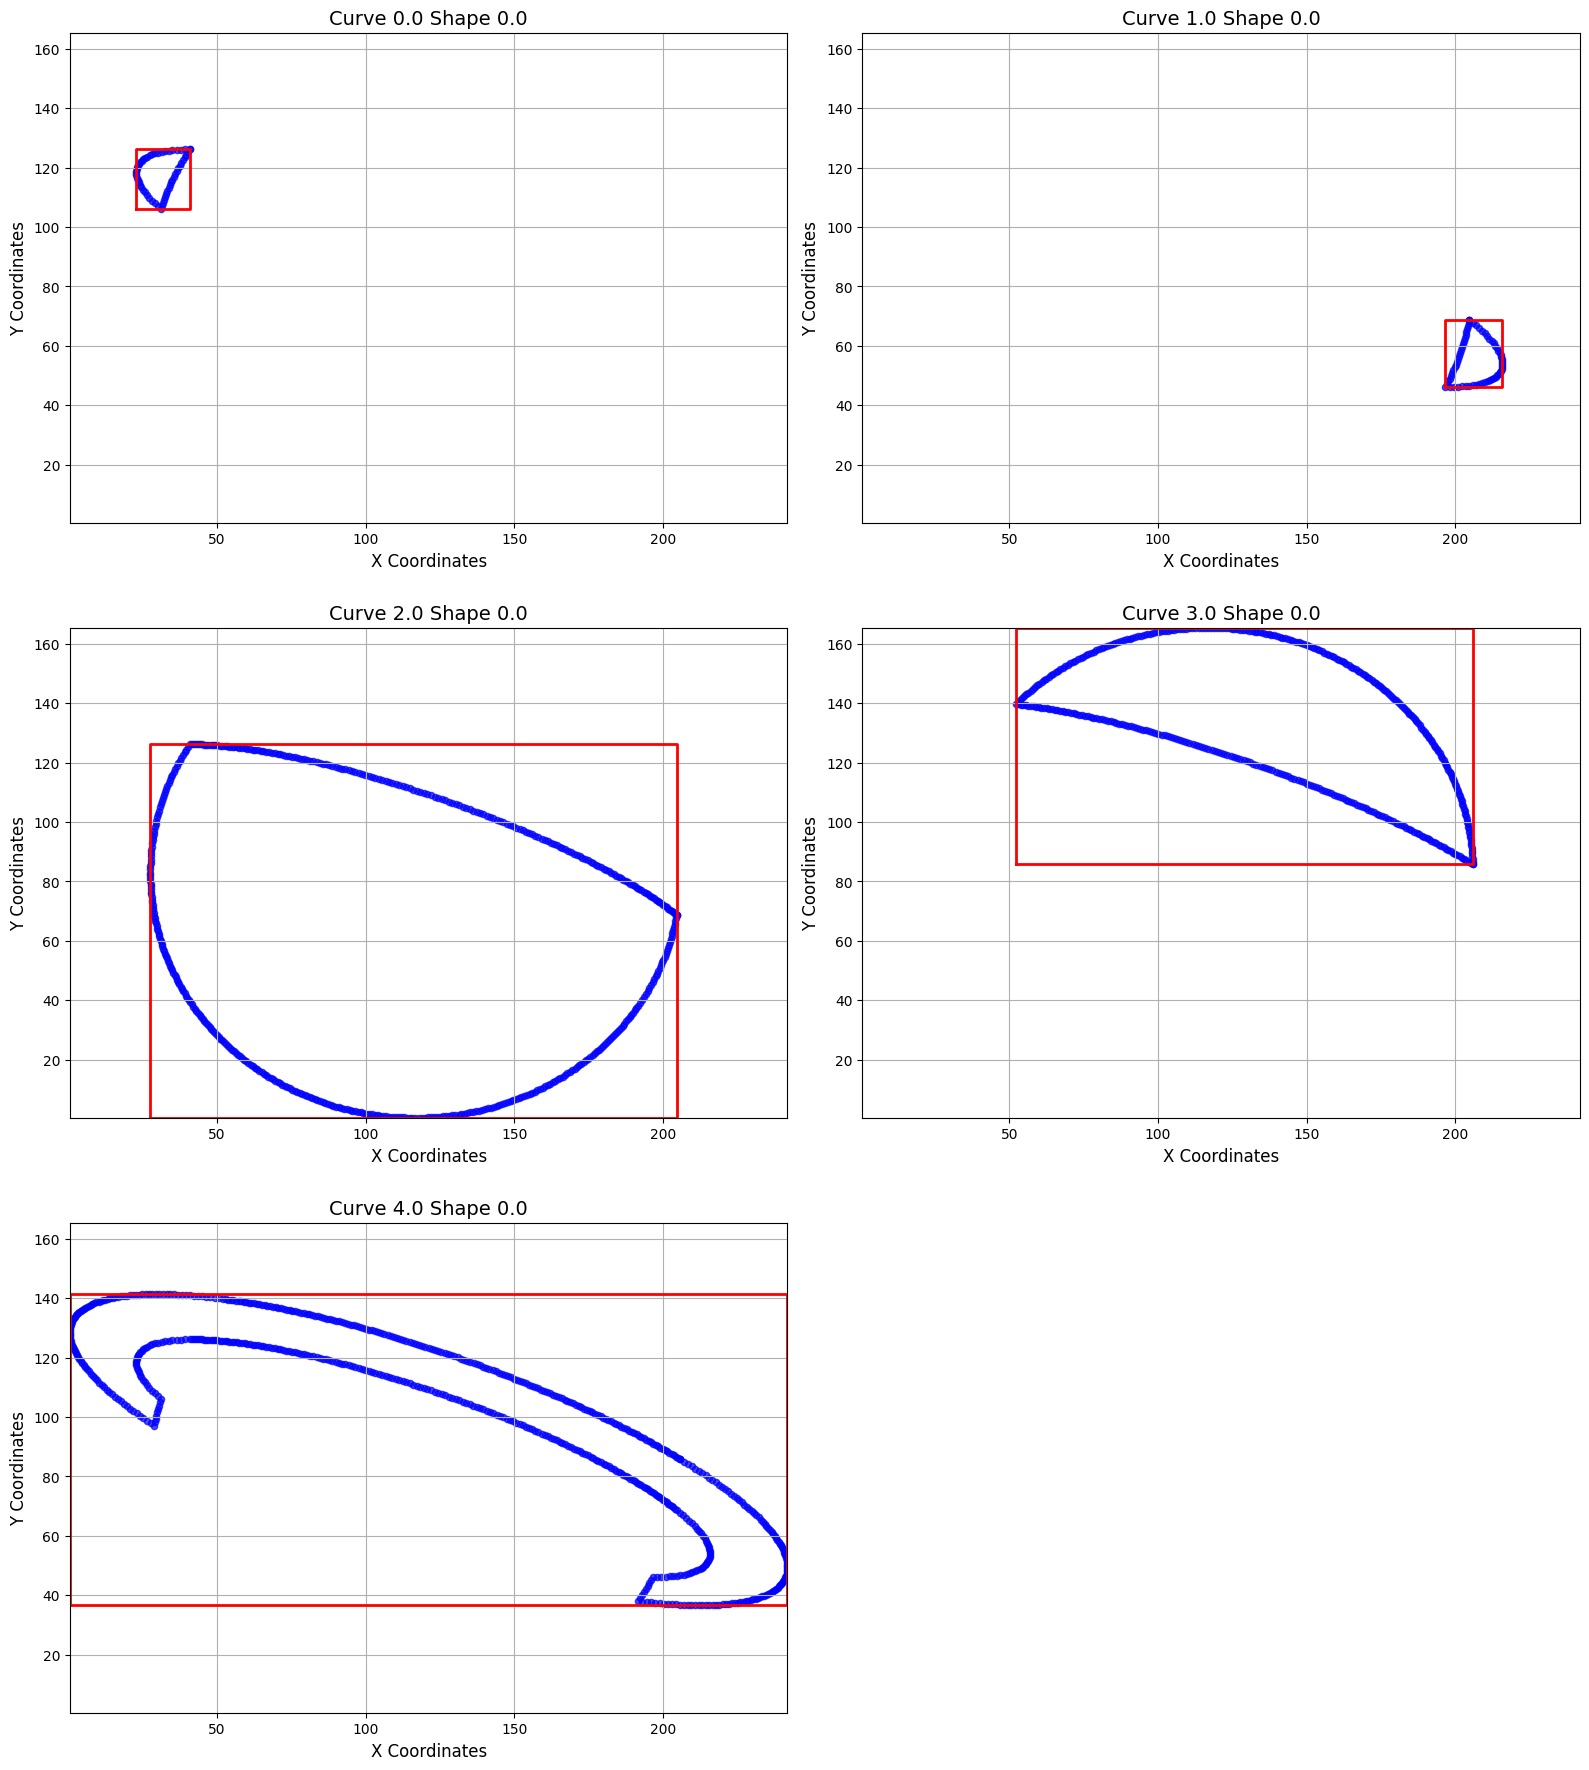

In [4]:
shape_bounds_df = df.groupby(['Curve', 'Shape']).agg(
    X_Min=('X', 'min'),
    X_Max=('X', 'max'),
    Y_Min=('Y', 'min'),
    Y_Max=('Y', 'max')
).reset_index()

# Merge the original dataframe with the bounds data
df_with_bounds = pd.merge(df, shape_bounds_df, on=['Curve', 'Shape'])

# Determine the number of subplots needed
num_shapes = df_with_bounds.groupby(['Curve', 'Shape']).ngroups
cols = 2  # Reduce columns to make the plots larger
rows = int(np.ceil(num_shapes / cols))

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 6))
axes = axes.flatten()

# Set the same limits for all subplots
x_min_global = df['X'].min()
x_max_global = df['X'].max()
y_min_global = df['Y'].min()
y_max_global = df['Y'].max()

# Plot each shape with its bounding box
for idx, ((curve, shape), group) in enumerate(df_with_bounds.groupby(['Curve', 'Shape'])):
    ax = axes[idx]

    # Plot the individual points of the shape
    ax.scatter(group['X'], group['Y'], alpha=0.7, s=20, c='blue')

    # Plot the bounding box
    x_min, x_max = group['X_Min'].values[0], group['X_Max'].values[0]
    y_min, y_max = group['Y_Min'].values[0], group['Y_Max'].values[0]
    ax.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], color='red', linewidth=2)

    # Labels and Titles
    ax.set_title(f'Curve {curve} Shape {shape}', fontsize=14)
    ax.set_xlabel('X Coordinates', fontsize=12)
    ax.set_ylabel('Y Coordinates', fontsize=12)

    # Ensure the aspect ratio is correct and apply the same limits
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(x_min_global, x_max_global)
    ax.set_ylim(y_min_global, y_max_global)
    ax.grid(True)

# Remove any empty subplots
for i in range(num_shapes, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()